In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
Follower=pd.read_csv('Follower.csv')
Follower['Space_Headway'] -4.572

0      129.430272
1      129.131568
2      128.832864
3      128.531112
4      128.235456
          ...    
516      6.333744
517      6.449568
518      6.571488
519      6.681216
520      6.790944
Name: Space_Headway, Length: 521, dtype: float64

In [3]:
Lead=pd.read_csv('leader.csv')


In [4]:
L = len(Lead)
Lead = Lead.reset_index() #reindexign to avoid zero
del Lead['index']
Lead.index = Lead.index + 1

In [5]:
Lead.v_Vel

1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
517    3.194304
518    3.453384
519    3.788664
520    4.056888
521    4.197096
Name: v_Vel, Length: 521, dtype: float64

In [6]:
len(Lead)

521

In [17]:
#Leader 511
xpos = 482.768453-pd.DataFrame(Lead['Local_Y'])
N = len(Lead)
T = pd.DataFrame(Lead['Frame_ID'])

xn = []
newar=[]
id=511
for i in range (0, len(xpos)):
    if i==0:
        vr = np.round_((xpos.iat[Lead.index.start,-1]-xpos.iat[Lead.index.start-1,-1])/0.1,4)
        ar = np.round_((xpos.iat[Lead.index.start+1,-1]-2*xpos.iat[Lead.index.start,-1]+xpos.iat[Lead.index.start-1,-1])/0.01,4)
      
    elif i==len(xpos):
        vr = np.round_((xpos.iat[len(xpos)-1,-1]-xpos.iat[len(xpos)-2,-1])/0.1,4)
        ar=  np.round_((xpos.iat[len(xpos)-1,-1]-2*xpos.iat[len(xpos)-2,-1]+ xpos.iat[len(xpos)-3,-1])/0.01,4)
        
    elif i>1 and i< len(xpos)-1:
        vr = np.round_((xpos.iat[i+1,-1]-xpos.iat[i-1,-1])/0.2,4)
        ar = np.round_((xpos.iat[i+1,-1]-2*xpos.iat[i,-1]+xpos.iat[i-1,-1])/0.01,4)
        
    newar.append([id,T.iat[i,-1],xpos.iat[i,-1],vr,ar])
            
newdata3 = pd.DataFrame(newar, columns = ["Vehicle_ID", "FrameID","leaderLocal_Y","Approx_Vel","Approx_Acc"])  

In [18]:
newdata3

,Vehicle_ID,FrameID,leaderLocal_Y,Approx_Vel,Approx_Acc
0,511,3341,134.002882,0.0000,0.0000
1,511,3342,134.002882,0.0000,0.0000
2,511,3343,134.002882,0.0000,0.0000
3,511,3344,134.002882,0.0000,0.0000
4,511,3345,134.002882,0.0000,0.0000
...,...,...,...,...,...
516,511,3857,302.000412,3.1044,1.5545
517,511,3858,302.318623,3.4061,4.4806
518,511,3859,302.681640,3.8374,4.1453
519,511,3860,303.086110,4.1514,2.1336


In [19]:
vn=[]
an=[]
approx_v=[]
approx_a=[]
vr = Lead[["v_Vel"]]    #instantaneous velocity smoothened
ar= Lead[["v_Acc"]]     #instantaneous acceleration smoothened
approx_vr = newdata3[["Approx_Vel"]]    #numerical method derived speed 
approx_ar= newdata3[["Approx_Acc"]]     # numerical method derived acceleration
T = 1.5
dt = 0.1
de = T/dt
d = 3*de



In [20]:
approx_vr.iloc[520]

Approx_Vel    4.1514
Name: 520, dtype: float64

In [21]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = approx_vr.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        approx_v = np.append(approx_v,anew)
        approx_v = pd.DataFrame(approx_v)

In [22]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = approx_ar.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        approx_a = np.append(approx_a,anew)
        approx_a = pd.DataFrame(approx_a)

In [23]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = ar.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        an = np.append(an,anew)
        an = pd.DataFrame(an)

In [24]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            xt = xpos.iloc[j-1]
            vt = vr.iloc[j-1]
            Y = xt*(np.exp(-(np.abs(n-j))/de))
            A= vt*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            y = y + Y
            a = a + A
        xnew = y/z
        vnew = a/z
        xn = np.append(xn,xnew)
        vn = np.append(vn,vnew)
        xn = pd.DataFrame(xn)
        vn = pd.DataFrame(vn)

In [25]:
newdata3=newdata3.assign(lead_Smooth_v_vel = vn)
newdata3=newdata3.assign(lead_Smooth_approx_v_vel = approx_v)
newdata3=newdata3.assign(lead_Smooth_approx_v_Acc = approx_a)
newdata3=newdata3.assign(lead_Smooth_v_Acc = an)
newdata3=newdata3.assign(lead_Smooth_Y= xn)

In [26]:
newdata3

,Vehicle_ID,FrameID,leaderLocal_Y,Approx_Vel,Approx_Acc,lead_Smooth_v_vel,lead_Smooth_approx_v_vel,lead_Smooth_approx_v_Acc,lead_Smooth_v_Acc,lead_Smooth_Y
0,511,3341,134.002882,0.0000,0.0000,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,134.002882
1,511,3342,134.002882,0.0000,0.0000,3.483090e-12,3.483090e-12,3.483090e-12,3.483090e-12,134.002882
2,511,3343,134.002882,0.0000,0.0000,2.163865e-12,2.163865e-12,2.163865e-12,2.163865e-12,134.002882
3,511,3344,134.002882,0.0000,0.0000,1.597745e-12,1.597745e-12,1.597745e-12,1.597745e-12,134.002882
4,511,3345,134.002882,0.0000,0.0000,1.283585e-12,1.283585e-12,1.283585e-12,1.283585e-12,134.002882
...,...,...,...,...,...,...,...,...,...,...
516,511,3857,302.000412,3.1044,1.5545,3.326882e+00,3.329898e+00,2.261760e+00,1.981363e+00,302.064267
517,511,3858,302.318623,3.4061,4.4806,3.520731e+00,3.517039e+00,2.254311e+00,1.928905e+00,302.381307
518,511,3859,302.681640,3.8374,4.1453,3.739880e+00,3.734306e+00,2.934343e+00,2.266021e+00,302.718257
519,511,3860,303.086110,4.1514,2.1336,4.015175e+00,4.049085e+00,2.789103e+00,1.954384e+00,303.093062


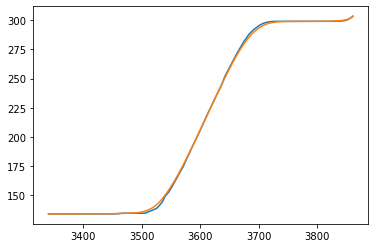

In [27]:
plt.plot(newdata3["FrameID"],newdata3["leaderLocal_Y"])
plt.plot(newdata3["FrameID"],newdata3["lead_Smooth_Y"])


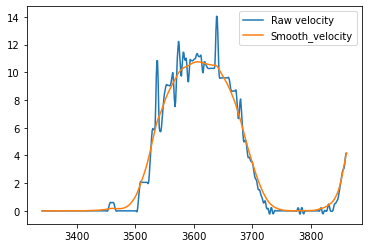

In [28]:
plt.plot(newdata3["FrameID"],newdata3["Approx_Vel"])
plt.plot(newdata3["FrameID"],newdata3["lead_Smooth_approx_v_vel"])
plt.legend(["Raw velocity","Smooth_velocity"])


In [29]:
L = len(Follower)
Follower = Follower.reset_index() #reindexign to avoid zero
del Follower['index']
Follower.index = Follower.index + 1

id=528
xpos = 482.768453-pd.DataFrame(Follower['Local_Y'])
N = len(Follower)
T = pd.DataFrame(Follower['Frame_ID'])

xn = []
newar=[]
for i in range (0, len(xpos)):
    if i==0:
        vr = np.round_((xpos.iat[Follower.index.start,-1]-xpos.iat[Follower.index.start-1,-1])/0.1,4)
        ar = np.round_((xpos.iat[Follower.index.start+1,-1]-2*xpos.iat[Follower.index.start,-1]+xpos.iat[Follower.index.start-1,-1])/0.01,4)
    elif i==len(xpos):
        vr = np.round_((xpos.iat[len(xpos)-1,-1]-xpos.iat[len(xpos)-2,-1])/0.1,4)
        ar=  np.round_((xpos.iat[len(xpos)-1,-1]-2*xpos.iat[len(xpos)-2,-1]+ xpos.iat[len(xpos)-3,-1])/0.01,4)
        
    elif i>1 and i< len(xpos)-1:
        vr = np.round_((xpos.iat[i+1,-1]-xpos.iat[i-1,-1])/0.2,4)
        ar = np.round_((xpos.iat[i+1,-1]-2*xpos.iat[i,-1]+xpos.iat[i-1,-1])/0.01,4)
        
    newar.append([id,T.iat[i,-1],xpos.iat[i,-1],vr,ar])
            
newdata4 = pd.DataFrame(newar, columns = ["Vehicle_ID", "FrameID","Local_Y","Approx_vel","Approx_Acc"])  

In [30]:
newdata4

,Vehicle_ID,FrameID,Local_Y,Approx_vel,Approx_Acc
0,528,3341,2.000000e-07,2.9931,-0.0000
1,528,3342,2.993138e-01,2.9931,-0.0000
2,528,3343,5.986274e-01,2.9977,0.0914
3,528,3344,8.988554e-01,2.9886,-0.2743
4,528,3345,1.196340e+00,2.9413,-0.6706
...,...,...,...,...,...
516,528,3857,2.910947e+02,1.7663,4.8463
517,528,3858,2.912955e+02,2.2205,4.2367
518,528,3859,2.915388e+02,2.6792,4.9378
519,528,3860,2.918314e+02,3.0450,2.3774


In [31]:
vn=[]
an=[]
approx_v=[]
approx_a=[]
vr = Follower[["v_Vel"]]    #instantaneous velocity smoothened
ar= Follower[["v_Acc"]]     #instantaneous acceleration smoothened
approx_vr = newdata4[["Approx_vel"]]    #numerical method derived speed 
approx_ar= newdata4[["Approx_Acc"]]     # numerical method derived acceleration
T = 1.0
dt = 0.1
de = T/dt
d = 3*de


In [32]:

for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = approx_vr.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        approx_v = np.append(approx_v,anew)
        approx_v = pd.DataFrame(approx_v)

In [33]:

for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = approx_ar.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        approx_a = np.append(approx_a,anew)
        approx_a = pd.DataFrame(approx_a)

In [34]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            at = ar.iloc[j-1]
            A= at*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            a = a + A
        anew = a/z
        an = np.append(an,anew)
        an = pd.DataFrame(an)

In [35]:
for n in range (1, N+1):
            #xnew = []
        #n = 3
        D = np.amin([d,n-1,N-n])
        k = int(n-D)
        l = int(n+D)
        z = 0.00000000001
        y = 0.00000000001
        a = 0.00000000001
        for j in range (k, l+1):
            Z = np.exp(-(np.abs(n-j))/de)
            xt = xpos.iloc[j-1]
            vt = vr.iloc[j-1]
            Y = xt*(np.exp(-(np.abs(n-j))/de))
            A= vt*(np.exp(-(np.abs(n-j))/de))
            z = z +Z
            y = y + Y
            a = a + A
        xnew = y/z
        vnew = a/z
        xn = np.append(xn,xnew)
        vn = np.append(vn,vnew)
        xn = pd.DataFrame(xn)
        vn = pd.DataFrame(vn)

In [36]:
newdata4=newdata4.assign(fol_Smooth_v_vel = vn)
newdata4=newdata4.assign(fol_Smooth_approx_v_vel = approx_v)
newdata4=newdata4.assign(fol_Smooth_approx_v_Acc = approx_a)
newdata4=newdata4.assign(fol_Smooth_v_Acc = an)
newdata4=newdata4.assign(fol_Smooth_Y= xn)

In [37]:
newdata4

,Vehicle_ID,FrameID,Local_Y,Approx_vel,Approx_Acc,fol_Smooth_v_vel,fol_Smooth_approx_v_vel,fol_Smooth_approx_v_Acc,fol_Smooth_v_Acc,fol_Smooth_Y
0,528,3341,2.000000e-07,2.9931,-0.0000,3.075432,2.993100,1.000000e-11,1.000000e-11,2.000100e-07
1,528,3342,2.993138e-01,2.9931,-0.0000,3.075432,2.994581,2.943477e-02,3.559131e-12,2.993138e-01
2,528,3343,5.986274e-01,2.9977,0.0914,3.073069,2.983682,-1.587174e-01,-1.181209e-02,5.986451e-01
3,528,3344,8.988554e-01,2.9886,-0.2743,3.123946,3.020302,7.659470e-01,5.927089e-01,8.956606e-01
4,528,3345,1.196340e+00,2.9413,-0.6706,3.331285,3.239925,1.771194e+00,1.224384e+00,1.216249e+00
...,...,...,...,...,...,...,...,...,...,...
516,528,3857,2.910947e+02,1.7663,4.8463,1.699437,1.696920,4.033719e+00,2.753693e+00,2.912318e+02
517,528,3858,2.912955e+02,2.2205,4.2367,2.112802,2.133397,4.043669e+00,2.763438e+00,2.913766e+02
518,528,3859,2.915388e+02,2.6792,4.9378,2.534613,2.559575,3.785976e+00,2.456087e+00,2.915792e+02
519,528,3860,2.918314e+02,3.0450,2.3774,2.871214,2.927197,3.201960e+00,1.737561e+00,2.918390e+02


In [48]:
newdata4.to_csv('Approx_Fol.csv')

In [49]:
newdata3.to_csv('Approx_lead.csv')

In [40]:
import numpy as np
import pandas as pd
time=[]
time=np.arange(334, 386.1, 0.1)

In [41]:
dtime=pd.DataFrame(time,columns=["time"])
time1=time.tolist()
time1.pop()

386.10000000001185

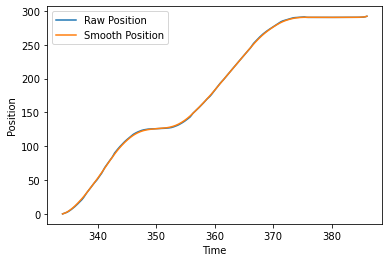

In [42]:
plt.plot(time1,newdata4["Local_Y"])
plt.plot(time1,newdata4["fol_Smooth_Y"])
plt.legend(["Raw Position","Smooth Position"])
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

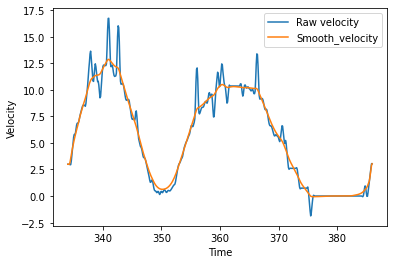

In [43]:
plt.plot(time1,newdata4["Approx_vel"])
plt.plot(time1,newdata4["fol_Smooth_approx_v_vel"])
plt.legend(["Raw velocity","Smooth_velocity"])
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

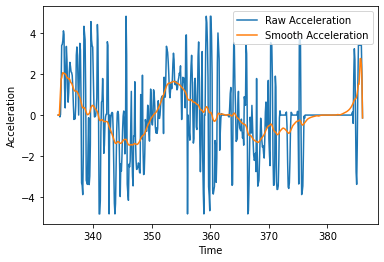

In [44]:
plt.plot(time1,Follower["v_Acc"])
plt.plot(time1,newdata4["fol_Smooth_v_Acc"])
plt.legend(["Raw Acceleration","Smooth Acceleration"])
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

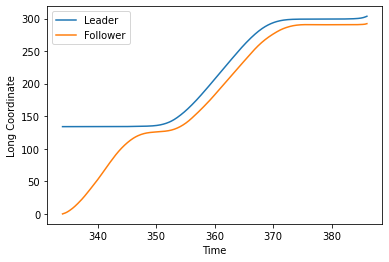

In [45]:
plt.plot(time1,newdata3["lead_Smooth_Y"])
plt.plot(time1,newdata4["fol_Smooth_Y"])
plt.legend(["Leader ","Follower"])
plt.xlabel('Time')
plt.ylabel('Long Coordinate')
plt.show()

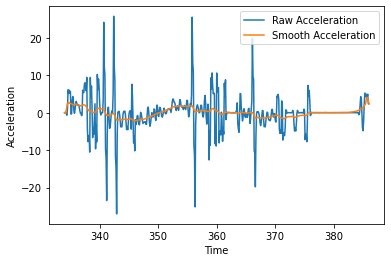

In [46]:
plt.plot(time1,newdata4["Approx_Acc"])
plt.plot(time1,newdata4["fol_Smooth_approx_v_Acc"])
plt.legend(["Raw Acceleration","Smooth Acceleration"])
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

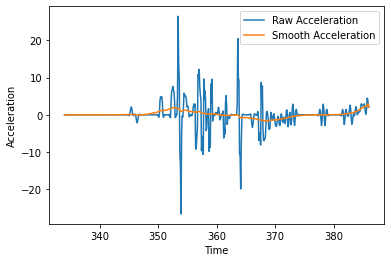

In [47]:
plt.plot(time1,newdata3["Approx_Acc"])
plt.plot(time1,newdata3["lead_Smooth_approx_v_Acc"])
plt.legend(["Raw Acceleration","Smooth Acceleration"])
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

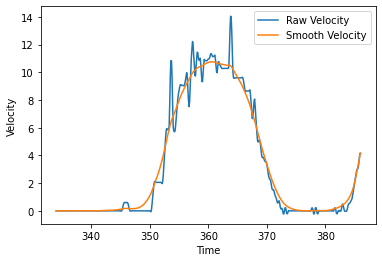

In [50]:
plt.plot(time1,newdata3["Approx_Vel"])
plt.plot(time1,newdata3["lead_Smooth_approx_v_vel"])
plt.legend(["Raw Velocity","Smooth Velocity"])
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

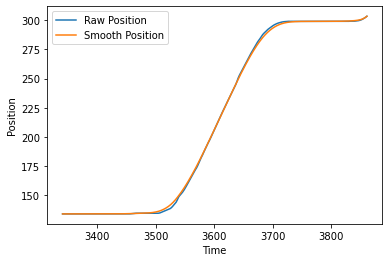

In [51]:
plt.plot(newdata3["FrameID"],newdata3["leaderLocal_Y"])
plt.plot(newdata3["FrameID"],newdata3["lead_Smooth_Y"])
plt.legend(["Raw Position","Smooth Position"])
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()